## Loading MNIST dataset
The MNIST dataset (a classic in the Machine Learning community) has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 


In [1]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# Having a look at Training Data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# Having a look at Test Data
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [4]:
# Exemining one specific image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

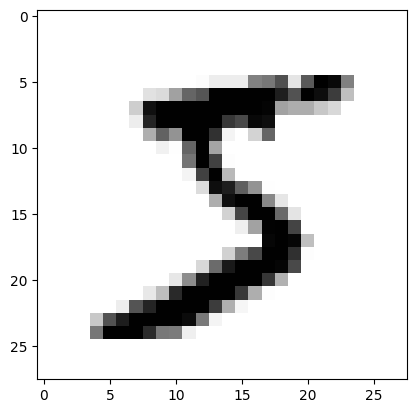

In [5]:
# Displaying the item from the training dataset
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
type(train_images[0])

numpy.ndarray

In [7]:
train_images[0].shape

(28, 28)

## Simple densely connected NN

In [8]:
# NN Architecture
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [9]:
# Compilation step
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 6ms/step - loss: 0.2657 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1064 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0702 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9886


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 67ms/step


array([7.1648114e-09, 6.1657808e-08, 1.5525344e-05, 3.5330420e-05,
       5.3540443e-11, 6.1070340e-09, 2.9306283e-13, 9.9994802e-01,
       4.0886228e-08, 1.0785536e-06], dtype=float32)

In [14]:
predictions[0].argmax() 

7

In [15]:
predictions[0][7] 

0.999948

In [16]:
test_labels[0] 

7

In [17]:
# Evaluating the model on new (test) data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0614 - accuracy: 0.9815
test_acc: 0.9815000295639038


In [18]:
# To see the weights of a trained model, let's use the get_weights() method:
weights = model.get_weights()

# 'weights' is a list containing weight tensors
for layer_weights in weights:
    print(layer_weights)

[[ 0.00157039 -0.01733812 -0.03473929 ... -0.00715619  0.04700591
   0.05974409]
 [ 0.06074499  0.05307575  0.04190505 ...  0.04652034 -0.02587642
   0.03393011]
 [ 0.03138145  0.03270746 -0.02150586 ... -0.06537941 -0.02759036
   0.05270448]
 ...
 [-0.02732549  0.01162165 -0.05610806 ... -0.02643742  0.00170431
  -0.0045673 ]
 [ 0.02956289 -0.05389144 -0.02799624 ... -0.03217169 -0.03961577
  -0.04894858]
 [-0.03624351  0.0169719  -0.00027599 ... -0.03937705 -0.04902107
  -0.05690415]]
[ 6.00034744e-02  3.18754353e-02  9.46640745e-02 -3.51471943e-03
 -2.62921285e-02  1.93754602e-02  4.75926846e-02  2.92324424e-02
  3.33586447e-02 -1.04276529e-02 -5.40025271e-02  4.01625372e-02
  9.48050932e-04  4.35824022e-02  8.13338310e-02  4.25913967e-02
 -1.21582430e-02  1.55048342e-02 -1.87265836e-02 -1.81048159e-02
 -1.94323678e-02  3.05203944e-02  6.57678349e-03  1.25763603e-02
 -2.04154756e-02  1.00030685e-02  3.22442763e-02  8.64919499e-02
 -1.43418023e-02 -1.27593148e-02 -5.45710372e-03  4.9

In [19]:
len(weights)

4

In [20]:
for layer_weights in weights:
    print(layer_weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


## Initializing random weights and creating NN with those weights

In [21]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

input = 28*28
hidden = 512
output = 10

In [22]:
size = input*hidden + hidden + hidden*output + output
size

407050

In [23]:
random_weights = np.random.rand(size)
random_weights

array([0.37454012, 0.95071431, 0.73199394, ..., 0.83274859, 0.66486982,
       0.5787854 ])

In [24]:
weights_1 = random_weights[:input*hidden].reshape(input, hidden)
biases_1 = random_weights[input*hidden:input*hidden+hidden].reshape(hidden,)
weights_2 = random_weights[input*hidden+hidden:input*hidden+hidden+hidden*output].reshape(hidden, output)
biases_2 = random_weights[input*hidden+hidden+hidden*output:].reshape(output,)

weights_list = [weights_1, biases_1, weights_2, biases_2]

# Print the shapes of the weight arrays
for weights in weights_list:
    print(weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


In [25]:
# Defining the architecture of a neural network
new_network = keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=(784,)),
    layers.Dense(10, activation="softmax")
])

In [26]:
# Setting the weights of the model 
new_network.set_weights(weights_list)

# Compiling the model 
new_network.compile(optimizer="rmsprop",
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

In [27]:
new_network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Evaluating the model on train data
train_loss, train_acc = new_network.evaluate(train_images, train_labels)

1875/1875 [==============================] - 4s 2ms/step - loss: 795.9622 - accuracy: 0.0904


In [29]:
# Evaluating the model on new (test) data
test_loss, test_acc = new_network.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 805.0311 - accuracy: 0.0892
test_acc: 0.08919999748468399
